In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read from Excel

Terlampir excel 'quiz_2.xlx'

In [172]:
# df1 =
df1 = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vRIchbiGqcn-ZWdhEkFTQJG7kF31S-VibizGcJSK70JIrDuyHcwa-Ful2kqBGDxOA/pub?output=xlsx'
                    ,sheet_name = 'df1')

# df2 = 
df2 = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vRIchbiGqcn-ZWdhEkFTQJG7kF31S-VibizGcJSK70JIrDuyHcwa-Ful2kqBGDxOA/pub?output=xlsx'
                    ,sheet_name = 'df2')

# df3 = 
df3 = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vRIchbiGqcn-ZWdhEkFTQJG7kF31S-VibizGcJSK70JIrDuyHcwa-Ful2kqBGDxOA/pub?output=xlsx'
                    ,sheet_name = 'df3')

# Read from DB

Terlampir db 'quiz_2'

In [173]:
data = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/quiz_2.db')

# db1 = 
db1 = pd.read_sql_query('SELECT * FROM df1', data)
# db2 = 
db2 = pd.read_sql_query('SELECT * FROM df2', data)
# db3 =
db3 = pd.read_sql_query('SELECT * FROM df3', data)

# Combine Data

1. Lihat format data pada table ```df1```, ```df2``` dan ```df3``` tersebut, 
2. pelajari format nya dan kemudian gabung ```df1```, ```df2``` dan ```df3``` menjadi satu table yang nama nya ```df```

In [174]:
kombinasi_df1df2 = pd.concat([df1,df2], ignore_index=True)

In [175]:
kombinasi_df1df2df3 = kombinasi_df1df2.merge(df3)
df = kombinasi_df1df2df3
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address
0,142193.0,27in FHD Monitor,4.0,149.99,2019-01-01 09:08:00,599.96,"912 Cherry St, Boston, MA 02215"
1,145165.0,27in FHD Monitor,8.0,149.99,2019-01-01 09:58:00,1199.92,"237 4th St, Boston, MA 02215"
2,149929.0,27in 4K Gaming Monitor,2.0,389.99,2019-01-01 10:02:00,779.98,"167 Johnson St, New York City, NY 10001"
3,143699.0,27in 4K Gaming Monitor,8.0,389.99,2019-01-01 10:08:00,3119.92,"409 Center St, San Francisco, CA 94016"
4,144902.0,27in 4K Gaming Monitor,7.0,389.99,2019-01-01 10:23:00,2729.93,"169 Ridge St, Seattle, WA 98101"


# Classification

Klasifikasan Product sebagai kolom baru ```Product_type``` Berdasarkan ```Sales``` dan ```Kuartil (Q1, Q2, Q3)``` nya

1. Jika Sales <= Q1-Sales maka murah
2. Jika Sales > Q1-Sales  dan Sales < Q2-Sales maka murah - sedang
3. Jika Sales > Q2-Sales  dan Sales < Q3-Sales maka sedang - mahal
4. Jika Sales > Q3-Sales maka mahal

In [176]:
df.Sales.describe()

count    24127.000000
mean      1458.588800
std       1087.448517
min        109.990000
25%        599.960000
50%       1139.970000
75%       2279.940000
max       3899.900000
Name: Sales, dtype: float64

In [177]:
Q1Sales = df[['Sales']].quantile(0.25)
Q2Sales = df[['Sales']].quantile(0.5)
Q3Sales = df[['Sales']].quantile(0.75)

print(f'Q1: {Q1Sales}')
print(f'Q2: {Q2Sales}')
print(f'Q3: {Q3Sales}')

Q1: Sales    599.96
Name: 0.25, dtype: float64
Q2: Sales    1139.97
Name: 0.5, dtype: float64
Q3: Sales    2279.94
Name: 0.75, dtype: float64


In [178]:
def clasifikasi(Sales):
    if (Sales <= 599.96):
        return 'Murah'
    elif (599.96 < Sales < 1139.97):
        return 'Murah-Sedang'
    elif (1139.97 < Sales < 2279.94):
        return 'Sedang-Mahal'
    else:
        return 'Mahal'

df['Product_type'] = df['Sales'].apply(lambda x: clasifikasi(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Product_type
0,142193.0,27in FHD Monitor,4.0,149.99,2019-01-01 09:08:00,599.96,"912 Cherry St, Boston, MA 02215",Murah
1,145165.0,27in FHD Monitor,8.0,149.99,2019-01-01 09:58:00,1199.92,"237 4th St, Boston, MA 02215",Sedang-Mahal
2,149929.0,27in 4K Gaming Monitor,2.0,389.99,2019-01-01 10:02:00,779.98,"167 Johnson St, New York City, NY 10001",Murah-Sedang
3,143699.0,27in 4K Gaming Monitor,8.0,389.99,2019-01-01 10:08:00,3119.92,"409 Center St, San Francisco, CA 94016",Mahal
4,144902.0,27in 4K Gaming Monitor,7.0,389.99,2019-01-01 10:23:00,2729.93,"169 Ridge St, Seattle, WA 98101",Mahal


# Split Collumn

Split kolom 'Purchase Address' menjadi 3 kolom dengan delimeter nya adalah koma (,) dan kolom 'Purchase Address' di delete

*clue : bisa pakai regex atau metode lain*

1. Kolom ```Jalan```
2. Kolom ```Kota```
3. Kolom ```Zip Code```

In [179]:
df['Purchase Address'].str.split(',')


0                [912 Cherry St,  Boston,  MA 02215]
1                   [237 4th St,  Boston,  MA 02215]
2        [167 Johnson St,  New York City,  NY 10001]
3         [409 Center St,  San Francisco,  CA 94016]
4                [169 Ridge St,  Seattle,  WA 98101]
                            ...                     
24122        [411 5th St,  New York City,  NY 10001]
24123    [675 Dogwood St,  San Francisco,  CA 94016]
24124      [384 Jackson St,  Los Angeles,  CA 90001]
24125        [172 2nd St,  San Francisco,  CA 94016]
24126      [594 South St,  San Francisco,  CA 94016]
Name: Purchase Address, Length: 24127, dtype: object

In [180]:
df[["Jalan", "Kota", "Zip Code"]] = df["Purchase Address"].str.split(",", expand = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Product_type,Jalan,Kota,Zip Code
0,142193.0,27in FHD Monitor,4.0,149.99,2019-01-01 09:08:00,599.96,"912 Cherry St, Boston, MA 02215",Murah,912 Cherry St,Boston,MA 02215
1,145165.0,27in FHD Monitor,8.0,149.99,2019-01-01 09:58:00,1199.92,"237 4th St, Boston, MA 02215",Sedang-Mahal,237 4th St,Boston,MA 02215
2,149929.0,27in 4K Gaming Monitor,2.0,389.99,2019-01-01 10:02:00,779.98,"167 Johnson St, New York City, NY 10001",Murah-Sedang,167 Johnson St,New York City,NY 10001
3,143699.0,27in 4K Gaming Monitor,8.0,389.99,2019-01-01 10:08:00,3119.92,"409 Center St, San Francisco, CA 94016",Mahal,409 Center St,San Francisco,CA 94016
4,144902.0,27in 4K Gaming Monitor,7.0,389.99,2019-01-01 10:23:00,2729.93,"169 Ridge St, Seattle, WA 98101",Mahal,169 Ridge St,Seattle,WA 98101


In [181]:
del df['Purchase Address']

In [182]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Product_type,Jalan,Kota,Zip Code
0,142193.0,27in FHD Monitor,4.0,149.99,2019-01-01 09:08:00,599.96,Murah,912 Cherry St,Boston,MA 02215
1,145165.0,27in FHD Monitor,8.0,149.99,2019-01-01 09:58:00,1199.92,Sedang-Mahal,237 4th St,Boston,MA 02215
2,149929.0,27in 4K Gaming Monitor,2.0,389.99,2019-01-01 10:02:00,779.98,Murah-Sedang,167 Johnson St,New York City,NY 10001
3,143699.0,27in 4K Gaming Monitor,8.0,389.99,2019-01-01 10:08:00,3119.92,Mahal,409 Center St,San Francisco,CA 94016
4,144902.0,27in 4K Gaming Monitor,7.0,389.99,2019-01-01 10:23:00,2729.93,Mahal,169 Ridge St,Seattle,WA 98101


# Month , Year Collumn

Buat kolom baru yaitu ```Month```, ```Month Name``` dan ```Year``` dari kolom ```Order Date```

In [183]:
df['Month'] = df['Order Date'].dt.strftime("%m")
df['Month Name'] = df['Order Date'].dt.strftime("%B")
df['Year'] = df['Order Date'].dt.strftime("%Y")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Product_type,Jalan,Kota,Zip Code,Month,Month Name,Year
0,142193.0,27in FHD Monitor,4.0,149.99,2019-01-01 09:08:00,599.96,Murah,912 Cherry St,Boston,MA 02215,01,January,2019
1,145165.0,27in FHD Monitor,8.0,149.99,2019-01-01 09:58:00,1199.92,Sedang-Mahal,237 4th St,Boston,MA 02215,01,January,2019
2,149929.0,27in 4K Gaming Monitor,2.0,389.99,2019-01-01 10:02:00,779.98,Murah-Sedang,167 Johnson St,New York City,NY 10001,01,January,2019
3,143699.0,27in 4K Gaming Monitor,8.0,389.99,2019-01-01 10:08:00,3119.92,Mahal,409 Center St,San Francisco,CA 94016,01,January,2019
4,144902.0,27in 4K Gaming Monitor,7.0,389.99,2019-01-01 10:23:00,2729.93,Mahal,169 Ridge St,Seattle,WA 98101,01,January,2019


# Group
Grouping Data by Month, Month Name, Year, Product, Sales, Sum(Quantity Ordered), Sum(Sales), Count(Order ID)

In [184]:
df_group=df.groupby(['Month','Month Name', 'Year', 'Product']).agg({'Quantity Ordered':['sum'], 'Sales':['sum'], 
                                                                    'Order ID':['count']
                                                                   })

df_group.columns = ['Sum(Quantity Ordered)', 'Sum(Sales)', 'Count(Order ID)']
df_group

Sum(Quantity Ordered)  \
Month Month Name Year Product                                         
01    January    2019 20in Monitor                           1216.0   
                      27in 4K Gaming Monitor                 1728.0   
                      27in FHD Monitor                       2307.0   
                      34in Ultrawide Monitor                 1742.0   
02    February   2019 20in Monitor                           1403.0   
                      27in 4K Gaming Monitor                 2320.0   
                      27in FHD Monitor                       2613.0   
                      34in Ultrawide Monitor                 2241.0   
03    March      2019 20in Monitor                           1779.0   
                      27in 4K Gaming Monitor                 2742.0   
                      27in FHD Monitor                       3402.0   
                      34in Ultrawide Monitor                 2819.0   
04    April      2019 20in Monitor                           2099.0   
                      27in 4K Gaming Monitor                 3090.0   
                      27in FHD Monitor                       3970.0   
                      34in Ultrawide Monitor                 3616.0   
05    May        2019 20in Monitor                           1856.0   
                      27in 4K Gaming Monitor                 3097.0   
                      27in FHD Monitor                       3776.0   
                      34in Ultrawide Monitor                 2994.0   
06    June       2019 20in Monitor                           1788.0   
                      27in 4K Gaming Monitor                 2619.0   
                      27in FHD Monitor                       3137.0   
                      34in Ultrawide Monitor                 2540.0   
07    July       2019 20in Monitor                           1872.0   
                      27in 4K Gaming Monitor                 2752.0   
                      27in FHD Monitor                       3305.0   
                      34in Ultrawide Monitor                 2570.0   
08    August     2019 20in Monitor                           1318.0   
                      27in 4K Gaming Monitor                 2458.0   
                      27in FHD Monitor                       2686.0   
                      34in Ultrawide Monitor                 2095.0   
09    September  2019 20in Monitor                           1475.0   
                      27in 4K Gaming Monitor                 2083.0   
                      27in FHD Monitor                       2568.0   
                      34in Ultrawide Monitor                 2188.0   
10    October    2019 20in Monitor                           2387.0   
                      27in 4K Gaming Monitor                 4002.0   
                      27in FHD Monitor                       4373.0   
                      34in Ultrawide Monitor                 3670.0   
11    November   2019 20in Monitor                           2312.0   
                      27in 4K Gaming Monitor                 3197.0   
                      27in FHD Monitor                       3966.0   
                      34in Ultrawide Monitor                 2952.0   
12    December   2019 20in Monitor                           3119.0   
                      27in 4K Gaming Monitor                 4765.0   
                      27in FHD Monitor                       5254.0   
                      34in Ultrawide Monitor                 4541.0   

                                              Sum(Sales)  Count(Order ID)  
Month Month Name Year Product                                              
01    January    2019 20in Monitor             133747.84              213  
                      27in 4K Gaming Monitor   673902.72              313  
                      27in FHD Monitor         346026.93              419  
                      34in Ultrawide Monitor   661942.58              313  
02    February   2019 20in Monitor     

# Reporting

Buat report minimanl 3 berdasarkan data yang sudah olah dan gunakan visualisai

*olah datanya bisa di tambah jika teman teman rasa ada temuan atau insight lain dari data tersebut*

*visualisasi nya bisa gunakan di luar materi dan dapat di eksplore di (https://seaborn.pydata.org/)*


### Template setiap report nya
1. Visualisasi
2. Kesimpulan atau temuan dari visualisasi
3. Untuk Kesimpulan gunakan fitur markdown di jupyter (https://www.datacamp.com/tutorial/markdown-in-jupyter-notebook)



contoh :

# VISUALISASI

# A.

In [185]:
df_group1=df.groupby(['Product']).agg({'Quantity Ordered':['sum'], 'Sales':['sum']})

df_group1.columns = ['Sum(Quantity Ordered)', 'Sum(Sales)']
df_group1

,Sum(Quantity Ordered),Sum(Sales)
Product,,
20in Monitor,22624.0,2488413.76
27in 4K Gaming Monitor,34853.0,13592321.47
27in FHD Monitor,41357.0,6203136.43
34in Ultrawide Monitor,33968.0,12907500.32


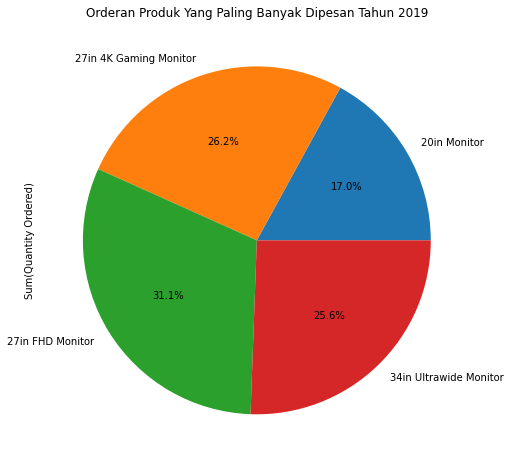

In [186]:
df_group1.plot.pie(title='Orderan Produk Yang Paling Banyak Dipesan Tahun 2019',y='Sum(Quantity Ordered)',
                   autopct='%1.1f%%', figsize=(8,8), legend=False)
plt.show()

# B.

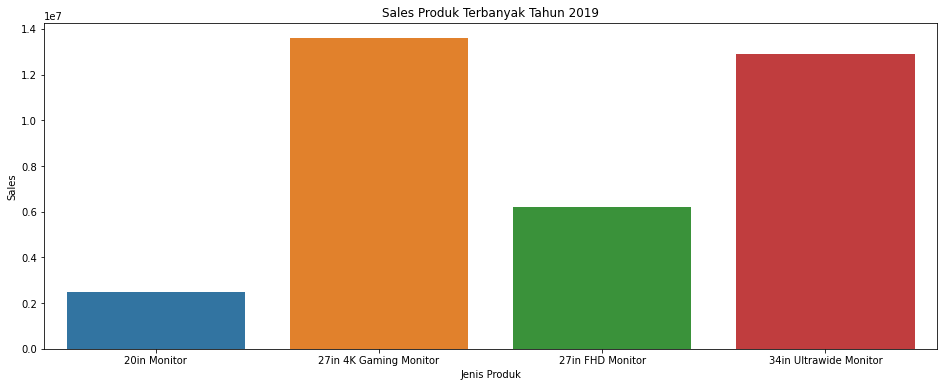

In [187]:
plt.figure(figsize=(16,6))
ax = sns.barplot( x=df_group1.index, y=df_group1['Sum(Sales)'])

plt.title('Sales Produk Terbanyak Tahun 2019')    
plt.xlabel('Jenis Produk')
plt.ylabel('Sales')
plt.show()

# C.

In [188]:
df_group2=df.groupby(['Month']).agg({'Sales':['sum']})

df_group2.columns = ['Sum(Sales)']
df_group2

,Sum(Sales)
Month,
01,1815620.07
02,2302574.23
03,2846482.58
04,3405442.25
05,3115992.77
06,2653739.16
07,2751445.01
08,2302514.43
09,2191176.86


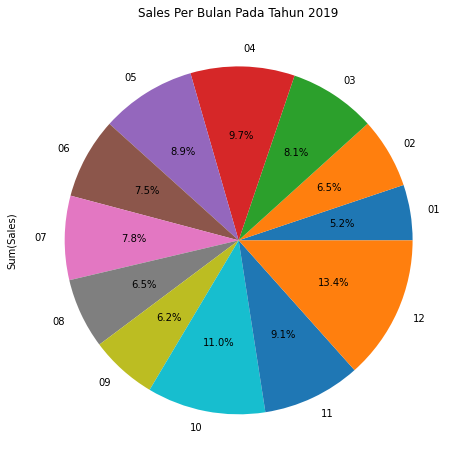

In [189]:
df_group2.plot.pie(title="Sales Per Bulan Pada Tahun 2019",y='Sum(Sales)', 
                   autopct='%1.1f%%', figsize=(8,8), legend=False)
plt.show()

# KESIMPULAN

<li> Untuk visualisasi bagian A, hasil yang didapatkan adalah keempat produk yaitu 20in Monitor, 27in 4K Gaming Monitor, 27in FHD Monitor, dan 34in Ultrawide Monitor, produk yang paling banyak dipesan tahun 2019 adalah produk 27in FHD Monitor sebesar 31,1%. Untuk produk yang paling sedikit dipesan adalah produk 20in Monitor dengan 17%.
    

<li> Untuk visualisasi bagian B, Sales produk terbesar tahun 2019 adalah produk 27in 4K Gaming Monitor sedangkan untuk sales produk terkecil tahun 2019 adalah produk 20in Monitor.
    
    
<li> Untuk visualisasi bagian C, hasil yang didapatkan adalah pada bulan desember 2019 merupakan sales terbesar sebesar 13,4% sedangkan untuk sales terkecil ada pada bulan januari 2019 sebesar 5,2%

# Tambahan untuk belajar SQL (sekarang tidak wajib)

Gunakan Python dan Pandas untuk insert data yang di group tadi ke SQLite dengan nama table ```summary_table``` buat syntax python nya di bawah